# Tensor Network Algorithms

In [1]:
%matplotlib inline
from quimb.tensor import *

## Matrix Product States

In [15]:
p = MPS_rand_state(n=20, bond_dim=50)
print(f"Site tags: '{p.site_tag_id}', site inds: '{p.site_ind_id}'")

Site tags: 'I{}', site inds: 'k{}'


In [16]:
print(p)

MatrixProductState([
    Tensor(shape=(50, 2), inds=('_dc4472000011a', 'k0'), tags={'I0'}),
    Tensor(shape=(50, 50, 2), inds=('_dc4472000011a', '_dc4472000011c', 'k1'), tags={'I1'}),
    Tensor(shape=(50, 50, 2), inds=('_dc4472000011c', '_dc4472000011e', 'k2'), tags={'I2'}),
    Tensor(shape=(50, 50, 2), inds=('_dc4472000011e', '_dc4472000011A', 'k3'), tags={'I3'}),
    Tensor(shape=(50, 50, 2), inds=('_dc4472000011A', '_dc4472000011C', 'k4'), tags={'I4'}),
    Tensor(shape=(50, 50, 2), inds=('_dc4472000011C', '_dc4472000011E', 'k5'), tags={'I5'}),
    Tensor(shape=(50, 50, 2), inds=('_dc4472000011E', '_dc44720000120', 'k6'), tags={'I6'}),
    Tensor(shape=(50, 50, 2), inds=('_dc44720000120', '_dc44720000122', 'k7'), tags={'I7'}),
    Tensor(shape=(50, 50, 2), inds=('_dc44720000122', '_dc44720000124', 'k8'), tags={'I8'}),
    Tensor(shape=(50, 50, 2), inds=('_dc44720000124', '_dc44720000126', 'k9'), tags={'I9'}),
    Tensor(shape=(50, 50, 2), inds=('_dc44720000126', '_dc44720000128',

In [17]:
p.show()

 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 
●──●──●──●──●──●──●──●──●──●──●──●──●──●──●──●──●──●──●──●
│  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │


Canonicalize the MPS.

In [19]:
p.left_canonize()
p.show()

 2 4 8 16 32 50 50 50 50 50 50 50 50 50 50 50 50 50 50 
>─>─>─>──>──>──>──>──>──>──>──>──>──>──>──>──>──>──>──●
│ │ │ │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │


In [20]:
p.H @ p

1.0000000000000004

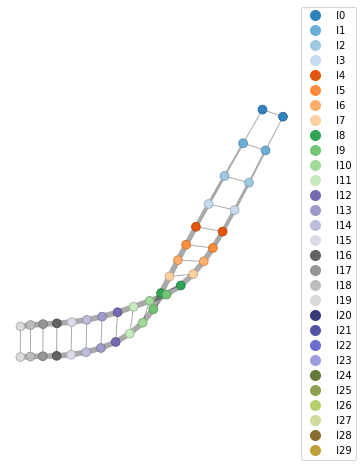

In [21]:
(p.H & p).graph(color=[f'I{i}' for i in range(30)], initial_layout='random')

Add MPS, and multiply/divide by scalars.

In [22]:
p2 = (p + p) / 2
p2.show()

 4 8 16 32 64 100 100 100 100 100 100 100 100 100 100 100 100 100 100 
●─●─●──●──●──●━━━●━━━●━━━●━━━●━━━●━━━●━━━●━━━●━━━●━━━●━━━●━━━●━━━●━━━●
│ │ │  │  │  │   │   │   │   │   │   │   │   │   │   │   │   │   │   │


In [23]:
p2.H @ p2

1.0

Compress.

In [24]:
p2.compress(form=10)
p2.show()

 2 4 8 16 32 50 50 50 50 50 50 50 50 50 32 16 8 4 2 
>─>─>─>──>──>──>──>──>──>──●──<──<──<──<──<──<─<─<─<
│ │ │ │  │  │  │  │  │  │  │  │  │  │  │  │  │ │ │ │


Get the tensor with tag 'I10'.

In [25]:
p2[10]

Tensor(shape=(50, 50, 2), inds=('_dc44720000126', '_dc44720000128', 'k10'), tags={'I10'})

Compute normalization of whole state.

In [26]:
p2[10].H @ p2[10]

0.9999999999999964

In [27]:
p2[10].norm()

0.9999999999999983

## Matrix Product Operators

Generate a random hermitian MPO and form an "overlap" network with our MPS.

In [28]:
A = MPO_rand_herm(20, bond_dim=7, tags=['HAM'])
pH = p.H

In [29]:
pH

<MatrixProductState(tensors=20, indices=39, structure='I{}', nsites=20)>

In [30]:
A

<MatrixProductOperator(tensors=20, indices=59, structure='I{}', nsites=20)>

In [31]:
# modify inplace
p.align_(A, pH)

(<MatrixProductState(tensors=20, indices=39, structure='I{}', nsites=20)>,
 <MatrixProductOperator(tensors=20, indices=59, structure='I{}', nsites=20)>,
 <MatrixProductState(tensors=20, indices=39, structure='I{}', nsites=20)>)

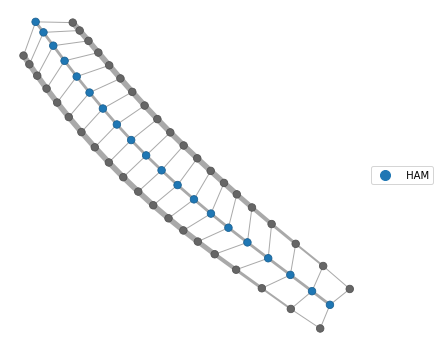

In [33]:
(pH & A & p).graph(color='HAM', iterations=1000)

In [34]:
(pH & A & p)

<TensorNetwork(tensors=60, indices=97, structure='I{}', nsites=20)>

In [35]:
(pH & A & p) ^ ...

1.622005442435975e-06

## Building Hamiltonians

### Intro to DMRG2

Build Hamiltonian term by term.

In [39]:
builder = SpinHam(S=1)

In [40]:
builder

In [41]:
builder += 1/2, '+', '-'

In [42]:
builder += 1/2, '-', '+'

In [43]:
builder += 1, 'Z', 'Z'

In [45]:
H = builder.build_mpo(n=100)

In [46]:
H

<MatrixProductOperator(tensors=100, indices=299, structure='I{}', nsites=100)>

Construct 2-site DMRG object with the Hamiltonian MPO and a default sequence of maximum bond dimensions and a bond compression cutoff.

In [48]:
dmrg = DMRG2(H, bond_dims=[10, 20, 100, 100, 200], cutoffs=1e-10)

In [49]:
dmrg

Solve to a certain absolute energy tolerance.

In [50]:
dmrg.solve(tol=1e-6, verbosity=1)

SWEEP-1, direction=R, max_bond=(10/10), cutoff:1e-10


100%|##########################################| 99/99 [00:00<00:00, 115.73it/s]

Energy: -138.7097072507652 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-10



100%|##########################################| 99/99 [00:00<00:00, 146.94it/s]

Energy: -138.9367419525322 ... not converged.
SWEEP-3, direction=R, max_bond=(20/100), cutoff:1e-10



100%|###########################################| 99/99 [00:01<00:00, 81.27it/s]

Energy: -138.94004566969298 ... not converged.
SWEEP-4, direction=R, max_bond=(58/100), cutoff:1e-10



100%|###########################################| 99/99 [00:02<00:00, 33.28it/s]

Energy: -138.94008547712147 ... not converged.
SWEEP-5, direction=R, max_bond=(91/200), cutoff:1e-10



100%|###########################################| 99/99 [00:04<00:00, 20.59it/s]

Energy: -138.94008604576106 ... converged!


True

In [51]:
dmrg.state.show(max_width=80)

     3 9 27 54 64 73 78 83 87 90 91 94 95 95 95 95 94 94 94 94 93 93 93 92    
... >─>─>──>──>──>──>──>──>──>──>──>──>──>──>──>──>──>──>──>──>──>──>──>── ...
    │ │ │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │      
                                 ...                                  
     91 91 91 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90     
... >──>──>──>──>──>──>──>──>──>──>──>──>──>──>──>──>──>──>──>──>──>──>──> ...
    │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │    
                                 ...                                  
    90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 9    
... ──>──>──>──>──>──>──>──>──>──>──>──>──>──>──>──>──>──>──>──>──>──>──>─ ...
      │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │     
                                 ...                                  
    0 90 90 90 90 90 90 90 91 95 96 98 98 98 98 97 96 95 92 90 87 84 78 73  